In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Upload from outside
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


1. Download the dataset and Create a dataframe named as IMDB then check the head,
info, and describe methods on created dataframe IMDB.

In [ ]:
IMDB = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
IMDB.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Now Let's convert the sentiment column values to numerical values by a simple python list comprehension expression which is given below.



In [ ]:
IMDB['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

So we can see there are 2 columns - review and sentiment. sentiment is the target column that we need to predict. The dataset is completely balanced and it has equal number of positive and negative sentiments.

Let's take one review as sample and understand why we need to clean the text.

2. Perform pre-processing steps like Removing Punctuations, Numbers, and Special
Characters, Stop Words in dataset

In [ ]:
cleaned_review = IMDB['review'].loc[1]
cleaned_review

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

Normally any NLP task involves following text cleaning techniques -

a. Removal of HTML contents like "< br>".

b. Removal of punctutions, special characters like '\'.

c. Removal of stopwords like is, the which do not offer much insight.

d. Stemming/Lemmatization to bring back
multiple forms of same word to their common root like 'coming', 'comes' into 'come'.

e. Vectorization - Encode the numeric values once you have cleaned it.

f. Fit the data to the ML model.

We will apply all these techniques on this sample cleaned_review and understand how it works.

First of all we will remove HTML contents.

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(cleaned_review, "html.parser")
cleaned_review = soup.get_text()
cleaned_review

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

We can see HTML tags are removed; so in the next step we will remove everything except lower/upper case letters using Regular Expressions.

In [ ]:
import re

cleaned_review = re.sub('\[[^]]*\]', ' ', cleaned_review)
cleaned_review = re.sub('[^a-zA-Z]', ' ', cleaned_review)
cleaned_review

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

Next we will bring everything into lowercase.


In [ ]:
cleaned_review = cleaned_review.lower()
cleaned_review

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

Stopwords removal - since stopwords removal works on every word in your text we need to split the text.

In [ ]:
cleaned_review = cleaned_review.split()
cleaned_review

['a',
 'wonderful',
 'little',
 'production',
 'the',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming',
 'very',
 'old',
 'time',
 'bbc',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 'and',
 'sometimes',
 'discomforting',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 'the',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'not',
 'only',
 'has',
 'got',
 'all',
 'the',
 'polari',
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 'you',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'williams',
 'diary',
 'entries',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 'a',
 'masterful',
 'production',
 'about',
 'one',
 'of',
 'the',
 'great',
 'master',
 's',
 'of',
 'comedy',
 'and',
 'his',
 'life',
 'the',
 'realism',
 'really',
 'co

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

cleaned_review = [word for word in cleaned_review if not word in set(stopwords.words('english'))]
cleaned_review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actors',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voices',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'williams',
 'diary',
 'entries',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'orton',
 'halliwell',
 'sets',
 'particularly',
 'flat',
 'halliwell',
 'murals',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

3. Normalize review column by using Stemming or Lemmatization.

In [ ]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
cleaned_review_s = [ps.stem(word) for word in cleaned_review]
cleaned_review_s

['wonder',
 'littl',
 'product',
 'film',
 'techniqu',
 'unassum',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comfort',
 'sometim',
 'discomfort',
 'sens',
 'realism',
 'entir',
 'piec',
 'actor',
 'extrem',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voic',
 'pat',
 'truli',
 'see',
 'seamless',
 'edit',
 'guid',
 'refer',
 'william',
 'diari',
 'entri',
 'well',
 'worth',
 'watch',
 'terrificli',
 'written',
 'perform',
 'piec',
 'master',
 'product',
 'one',
 'great',
 'master',
 'comedi',
 'life',
 'realism',
 'realli',
 'come',
 'home',
 'littl',
 'thing',
 'fantasi',
 'guard',
 'rather',
 'use',
 'tradit',
 'dream',
 'techniqu',
 'remain',
 'solid',
 'disappear',
 'play',
 'knowledg',
 'sens',
 'particularli',
 'scene',
 'concern',
 'orton',
 'halliwel',
 'set',
 'particularli',
 'flat',
 'halliwel',
 'mural',
 'decor',
 'everi',
 'surfac',
 'terribl',
 'well',
 'done']

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()
cleaned_review = [lem.lemmatize(word) for word in cleaned_review]
cleaned_review

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actor',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voice',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'reference',
 'williams',
 'diary',
 'entry',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'come',
 'home',
 'little',
 'thing',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'technique',
 'remains',
 'solid',
 'disappears',
 'play',
 'knowledge',
 'sens',
 'particularly',
 'scene',
 'concerning',
 'orton',
 'halliwell',
 'set',
 'particularly',
 'flat',
 'halliwell',
 'mural',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

So, the difference identified here is we can see that 'little' has become 'littl' after Stemming but remained 'little' after Lemmatization. We will use Lemmatization.

4. Preprocessed review should be included in the IMDB data frame as ‘cleaned_review’.
Plot word cloud for the sentence.

In [ ]:
cleaned_review = ' '.join(cleaned_review)
cleaned_review

'wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done'

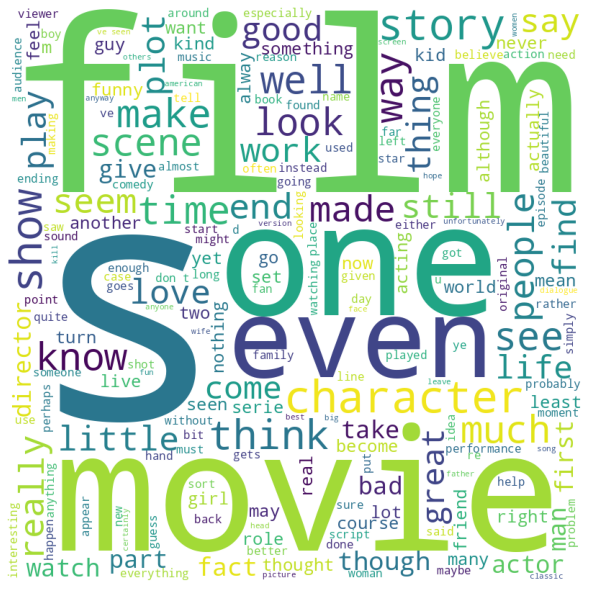

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in IMDB.cleaned_review:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Our next step will be to bring this text in mathematical forms and to do so we will create a Corpus first

In [ ]:
corpus = []
corpus.append(cleaned_review)

5. Create two objects X and y. X will be the ‘cleaned_review' column of IMDB data frame
and y will be the ' Sentiment' column.

a. Perform label encoding technique for sentiment column.

b. Create a TF-IDF object and split the data into training and testing sets. Train a
Support Vector machine and Display the confusion Matrix.

c. Create a BoW object and split the data into training and testing sets. Train a
Support Vector machine model and Display the confusion Matrix.

d. Compare BoW and TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()
review_count_vec = count_vec.fit_transform(corpus)

review_count_vec.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
        1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1]])

So we can see the data has become numeric with 1,2 and 3s based on the number of times they appear in the text.

There is another variation of CountVectorizer with binary=True and in that case all zero entries will have 1.

In [ ]:
count_vec_bin = CountVectorizer(binary=True)
review_count_vec_bin = count_vec_bin.fit_transform(corpus)

review_count_vec_bin.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

So there is no 2s and 3s in the vector.

We will now explore TF-IDF - TF stands for Text Frequency which means how many times a word (term) appears in a text (document). IDF means Inverse Document Frequency and is calculated as log(# of documents in corpus/# of documents containing the term).

Finally TF-IDF score is calculated as TF * IDF.

IDF acts as a balancing factor and diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
review_tfidf_vec = tfidf_vec.fit_transform(corpus)

review_tfidf_vec.toarray()

array([[0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.09712859, 0.19425717, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.19425717,
        0.09712859, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.19425717, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.19425717, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.29138576, 0.09

We will now apply all the techniques that we discussed on the whole dataset but there is no test dataset so we will keep 25% of the data aside to test the performance of the model.

In [ ]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test, train_data_label, test_data_label = train_test_split(IMDB['review'], IMDB['sentiment'], test_size=0.25, random_state=42)

Convert sentiments to numeric forms.

In [ ]:
train_data_label = (train_data_label.replace({'positive': 1, 'negative': 0})).values
test_data_label  = (test_data_label.replace({'positive': 1, 'negative': 0})).values

Clean the text and build the train and test corpus.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocessing(s):
    #remove stop words
    s = ' '.join([word for word in s.split() if word not in (stop_words)])
    #remove tags
    s = ' '.join([re.sub(r'<[^<>]*>', ' ', k) for k in s.split("\n")])
    #remove_numbers
    s = ' '.join([re.sub(r"[0-9]+", ' ', k) for k in s.split("\n")])
    #remove special characters and remove punctuation
    s = ' '.join([re.sub(r"[^\w]+", ' ', k) for k in s.split("\n")])
    #remove_stopwords
    return s

IMDB['cleaned_review'] = IMDB['review'].apply(preprocessing)

In [ ]:
IMDB['cleaned_review'].head(5)

0    One reviewers mentioned watching Oz episode ho...
1    A wonderful little production The filming tech...
2    I thought wonderful way spend time hot summer ...
3    Basically there s family little boy Jake think...
4    Petter Mattei s Love Time Money visually stunn...
Name: cleaned_review, dtype: object

In [ ]:
corpus_train = []
corpus_test  = []

for i in range(dataset_train.shape[0]):
    soup = BeautifulSoup(dataset_train.iloc[i], "html.parser")
    cleaned_review = soup.get_text()
    cleaned_review = re.sub('\[[^]]*\]', ' ', cleaned_review)
    cleaned_review = re.sub('[^a-zA-Z]', ' ', cleaned_review)
    cleaned_review = cleaned_review.lower()
    cleaned_review = cleaned_review.split()
    cleaned_review = [word for word in cleaned_review if not word in set(stopwords.words('english'))]
    lem = WordNetLemmatizer()
    cleaned_review = [lem.lemmatize(word) for word in cleaned_review]
    cleaned_review = ' '.join(cleaned_review)
    corpus_train.append(cleaned_review)

for j in range(dataset_test.shape[0]):
    soup = BeautifulSoup(dataset_test.iloc[j], "html.parser")
    cleaned_review = soup.get_text()
    cleaned_review = re.sub('\[[^]]*\]', ' ', cleaned_review)
    cleaned_review = re.sub('[^a-zA-Z]', ' ', cleaned_review)
    cleaned_review = cleaned_review.lower()
    cleaned_review = cleaned_review.split()
    cleaned_review = [word for word in cleaned_review if not word in set(stopwords.words('english'))]
    lem = WordNetLemmatizer()
    cleaned_review = [lem.lemmatize(word) for word in cleaned_review]
    cleaned_review = ' '.join(cleaned_review)
    corpus_test.append(cleaned_review)

Let's validate one sample entry.

In [ ]:
corpus_train[-1]

'decent movie although little bit short time pack lot action grit commonsense emotion time frame matt dillon main character great job movie emotion intensity convincing tense throughout movie typical fancy expensive hollywood cgi action movie satisfying movie indeed price evening great movie movie straight traditional action movie great acting story directing would recommend movie character development character good make believe actually seeing real event taking place movie believe made cheaper budget acting quality much higher'

In [ ]:
corpus_test[-1]

'wonderfully funny awe inspiring feature pioneer turntablism dj shadow q bert amazing terrific documentary check every major dj crediting getting scratch thanks herbie hancock post bop classic rockit archival footage complex mind blowing turntable routine time'

We will now vectorize using TF-IDF technique.

In [ ]:
tfidf_vec = TfidfVectorizer(ngram_range=(1, 3))

tfidf_vec_train = tfidf_vec.fit_transform(corpus_train)
tfidf_vec_test = tfidf_vec.transform(corpus_test)

I am going to use LinearSVC as my first model.

In [ ]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=0.5, random_state=42)
linear_svc.fit(tfidf_vec_train, train_data_label)

predict = linear_svc.predict(tfidf_vec_test)

Performance

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report: \n", classification_report(test_data_label, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict))
print("Accuracy: \n", accuracy_score(test_data_label, predict))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      6157
    Positive       0.89      0.92      0.91      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500

Confusion Matrix: 
 [[5467  690]
 [ 524 5819]]
Accuracy: 
 0.90288


Now we will vectorize using CountVectorizer(binary=False) and fit it on LinearSVC model.

In [ ]:
count_vec = CountVectorizer(ngram_range=(1, 3), binary=False)
count_vec_train = count_vec.fit_transform(corpus_train)
count_vec_test = count_vec.transform(corpus_test)

6. Build and display a dependency parser tree for the sentence

“I thought this movie did a down right good job”

In [ ]:
import spacy
from spacy import displacy
from spacy.lang.en.examples import sentences

# Load the language model
nlp = spacy.load("en_core_web_sm")

sentence = 'I thought this movie did a down right good job'

# nlp function returns an object with individual token information,
# linguistic features and relationships
doc = nlp(sentence)

print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print ("-" * 70)

for token in doc:
  # Print the token, dependency nature, head and all dependents of the token
  print ("{:<15} | {:<8} | {:<15} | {:<20}".format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))

 # Use displayCy to visualize the dependency
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Token           | Relation | Head            | Children            
----------------------------------------------------------------------
I               | nsubj    | thought         | []                  
thought         | ROOT     | thought         | [I, did]            
this            | det      | movie           | []                  
movie           | nsubj    | did             | [this]              
did             | ccomp    | thought         | [movie, job]        
a               | det      | job             | []                  
down            | amod     | job             | []                  
right           | advmod   | good            | []                  
good            | amod     | job             | [right]             
job             | dobj     | did             | [a, down, good]     


7. Display the HMM POS tagging on the first 4 rows of ‘cleaned_review’.

In [ ]:
# Importing libraries
import nltk
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import pprint, time

#download the treebank corpus from nltk
nltk.download('treebank')

#download the universal tagset from nltk
nltk.download('universal_tagset')

# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

#print the first two sentences along with tags
print(nltk_data[:4])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], [('Rudolph', 'NOUN'), ('Agnew', 'NOUN'), (',', '.'), ('55', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), ('and', 'CONJ'), ('former', 'ADJ'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Consolidated', 'NOUN'), ('Gold', 'NOUN'), ('Fields', 'NOUN'), ('PLC', 'NOUN'), (',', '.'), ('was', 'VERB'), ('named', 'VERB'), ('*-1', 'X'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('British', 'ADJ'), ('industrial', 'ADJ'), ('